<a href="https://colab.research.google.com/github/RajeshKurva/Mini_project/blob/main/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install joblib
%pip install flask
%pip install xgboost


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 23.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 37.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

In [3]:
df=pd.read_csv("water_potability.csv")
print(df.head())
print(df.tail())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
            ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.5

In [4]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
print(df.shape)
df.dtypes

(3276, 10)


ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [8]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


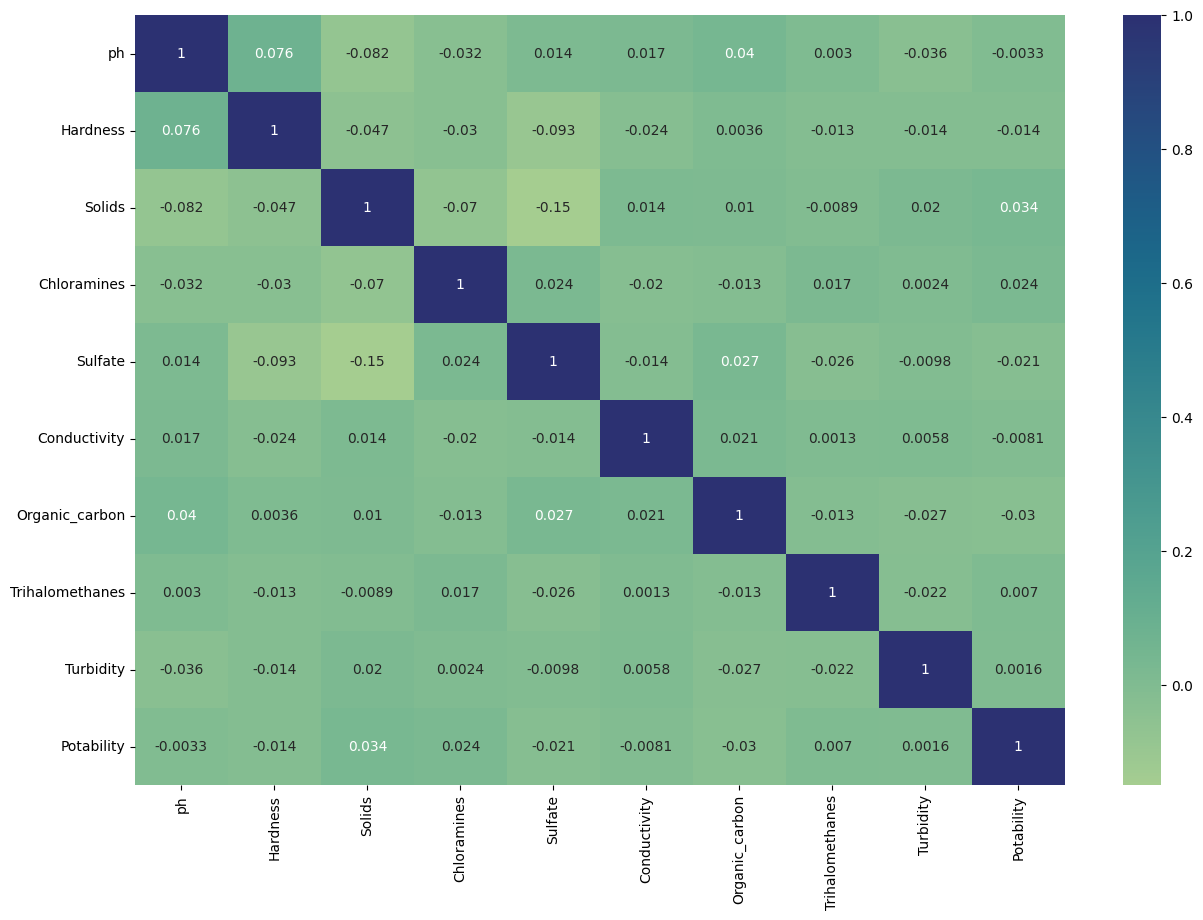

In [9]:

corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='crest')
plt.show()


Missing values after imputation:
 ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Summary Statistics:
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalom

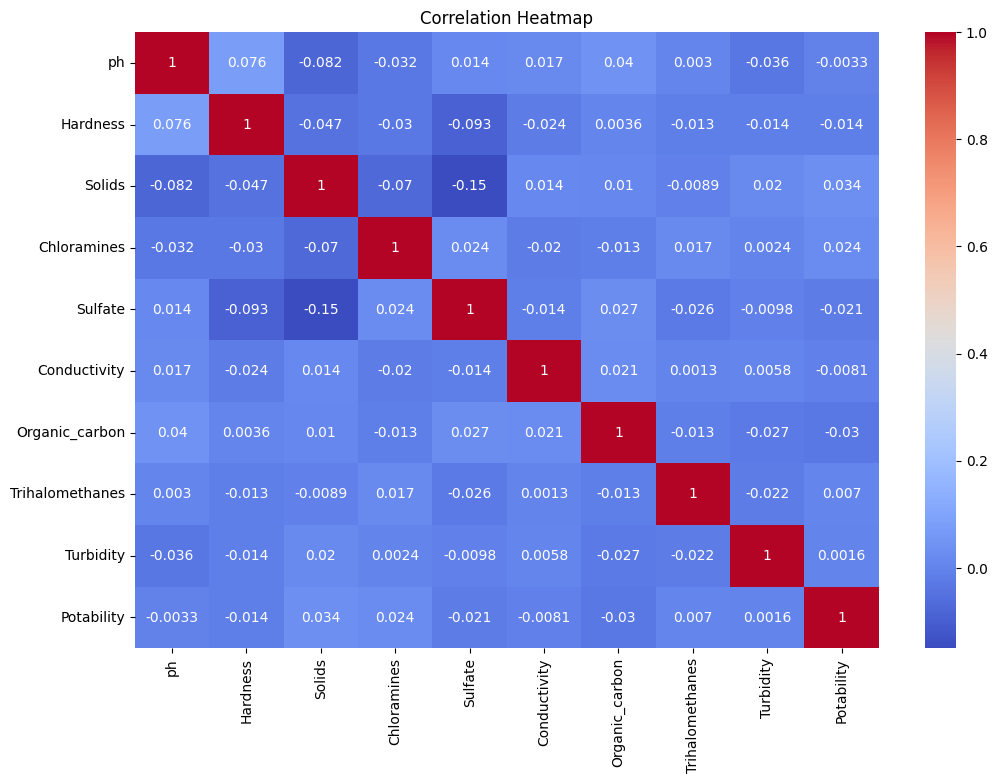

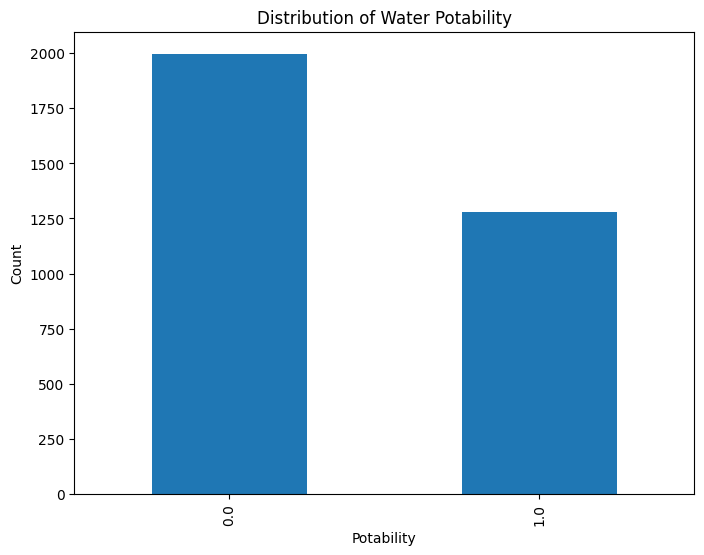


Random Forest Results:
Accuracy: 0.6784
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.86      0.77       412
         1.0       0.61      0.38      0.47       244

    accuracy                           0.68       656
   macro avg       0.65      0.62      0.62       656
weighted avg       0.67      0.68      0.66       656

Confusion Matrix:
[[353  59]
 [152  92]]

Gradient Boosting Results:
Accuracy: 0.6585
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.90      0.77       412
         1.0       0.59      0.26      0.36       244

    accuracy                           0.66       656
   macro avg       0.63      0.58      0.56       656
weighted avg       0.64      0.66      0.62       656

Confusion Matrix:
[[369  43]
 [181  63]]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Results:
Accuracy: 0.6204
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.87      0.74       412
         1.0       0.47      0.19      0.27       244

    accuracy                           0.62       656
   macro avg       0.56      0.53      0.51       656
weighted avg       0.58      0.62      0.57       656

Confusion Matrix:
[[360  52]
 [197  47]]

SVM Results:
Accuracy: 0.6951
Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.92      0.79       412
         1.0       0.70      0.32      0.44       244

    accuracy                           0.70       656
   macro avg       0.70      0.62      0.61       656
weighted avg       0.70      0.70      0.66       656

Confusion Matrix:
[[378  34]
 [166  78]]

Best Model: SVM with accuracy 0.6951
Cross-validation scores: [0.67175573 0.66603053 0.67748092 0.65267176 0.67557252]
Mean CV score: 0.6687

Predicti

/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [10]:

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Verify that missing values have been handled
print("\nMissing values after imputation:\n", df_imputed.isnull().sum())

# Display summary statistics
print("\nSummary Statistics:")
print(df_imputed.describe())

# Visualizations
plt.figure(figsize=(12, 8))
sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of target variable
plt.figure(figsize=(8, 6))
df_imputed['Potability'].value_counts().plot(kind='bar')
plt.title('Distribution of Water Potability')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.show()

# Prepare data for modeling
X = df_imputed.drop('Potability', axis=1)
y = df_imputed['Potability']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Find the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Cross-validation of the best model
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")

# Feature importance for Random Forest (if it's the best model)
if best_model_name == 'Random Forest':
    importances = best_model.feature_importances_
    feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
    print("\nFeature Importances:")
    print(feature_importances)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importances)
    plt.title("Feature Importances")
    plt.show()

# Function to predict water potability
def predict_potability(sample):
    sample_scaled = scaler.transform(sample)
    prediction = best_model.predict(sample_scaled)
    return "Potable" if prediction[0] == 1 else "Not Potable"

# Example prediction
sample = np.array([[7.0, 200.0, 20000.0, 7.0, 300.0, 400.0, 15.0, 70.0, 4.0]])  # Replace with actual values
print(f"\nPrediction for the sample: {predict_potability(sample)}")


In [11]:
import joblib  # Import joblib for saving the model


# Save the trained Random Forest model to a .pkl file
joblib.dump(best_model, 'best_model.pkl')
print("Model saved as best_model.pkl")

Model saved as best_model.pkl


In [12]:

# Example prediction
sample = np.array([[7.0, 200.0, 20000.0, 7.0, 300.0, 400.0, 15.0, 70.0, 4.0]])  # Replace with actual values
print(f"\nPrediction for the sample: {predict_potability(sample)}")


Prediction for the sample: Not Potable


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [13]:
import joblib  # Import joblib for saving the model

# Assuming you've already trained the Random Forest model
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train_scaled, y_train)

# Save the trained Random Forest model to a .pkl file
joblib.dump(best_model, 'random_forest_model.pkl')
print("Model saved as random_forest_model.pkl")


Model saved as random_forest_model.pkl


In [14]:
# Load the saved model
loaded_model = joblib.load('best_model.pkl')

#sample = np.array([[9.56485307, 251.806665, 17156.3367, 6.25317973, 346.705209, 410.32243, 18.6271257, 82.955872, 3.18280536]])
#sample = np.array([[6.73984973, 197.374482, 34702.4178, 5.86968468, 261.068006, 390.046573, 17.7579168, 91.3846052, 4.37963044]])
#sample = np.array([[5.15839641, 189.295789, 35086.397, 6.73611803, 340.871819, 331.586726, 12.9097978, 61.3446637, 4.64585243]])
#sample = np.array([[6.12484733, 151.691358, 15092.0176, 6.61078789, 382.318961, 388.137531, 16.6219594, 69.167847, 4.21196765]])
#sample = np.array([[8.89167405, 184.869606, 41801.4418, 3.40957584, 337.047108, 461.076821, 13.7155039, 42.0781221, 4.52259923]])
#sample = np.array([[7.09483083, 139.906866, 18975.6435, 7.57195141, 423.045974, 528.266523, 18.5561766, 68.6485817, 3.62845963]])
#sample = np.array([[2.37676808, 129.863973, 11684.1116, 9.97480788, 301.429747, 503.91039, 8.74125776, 76.3106947, 3.62921777]])
#sample = np.array([[6.49003717, 205.541517, 19397.3239, 7.8942448, 368.561073, 479.786195, 15.8050848, 56.9820195, 2.43088329]])
#sample = np.array([[6.8254679, 187.05171, 46140.1268, 6.13775746, 352.702182, 373.427235, 12.6063816, 58.7522013, 3.02744958]])
sample = np.array([[7.0, 200.0, 20000.0, 7.0, 300.0, 400.0, 15.0, 70.0, 4.0]]) 
#sample = np.array([[9.092223,181.101509,17978.986339,6.546600,310.135738 ,398.410813,11.558279 ,31.997993 ,4.075075]])
sample_scaled = scaler.transform(sample)  # Make sure to scale the sample before prediction
prediction = loaded_model.predict(sample_scaled)
print("Prediction:", "Potable" if prediction[0] == 1 else "Not Potable")


Prediction: Not Potable


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [15]:

#sample = np.array([[9.445130, 145.805402, 13168.529156, 9.444471, 310.583374, 592.659021, 8.606397, 77.577460, 3.875165]])
#sample=np.array([[5.579517, 223.616393, 13289.201653, 7.698690, 368.897034, 375.275969, 20.224426, 104.580881, 4.043915],] )
#sample=np.array([[8.073279, 191.815523, 17106.438645, 7.898732, 333.477592, 432.898749, 13.335381, 54.216284, 4.854313], ] )
sample=np.array([[5.344117, 198.379144, 13492.840835, 6.559265, 328.648845, 591.363369, 14.084388, 61.392983, 4.104699] ,] )
#sample = np.array([[6.100245, 160.608230, 13886.809713, 7.542775, 366.688795, 449.948287, 18.722860, 64.390521, 2.174898]])
#sample = np.array([[7.203439, 168.445358, 22826.484697, 6.283250, 271.892045, 437.370863, 16.410654, 64.505923, 6.389161]])
#sample = np.array([[6.706695, 232.926598, 27881.504407, 7.881448, 337.111017, 443.208774, 14.523389, 64.121740, 4.371882]])
#sample = np.array([[8.129342, 211.123312, 22982.927445, 6.779005, 326.397953, 367.988784, 13.910933, 55.795357, 4.822044]])
#sample = np.array([[10.485604, 136.577381, 32872.380566, 8.399435, 276.921835, 416.188546, 18.884625, 60.078413, 4.669240]])
#sample = np.array([[7.395451, 190.477892, 22561.508311, 8.310195, 294.030395, 413.910293, 13.301374, 63.410178, 4.990236]])
#sample = np.array([[5.327024, 233.140588, 13580.618483, 7.362411, 356.420271, 438.553499, 10.049772, 55.232271, 4.855821]])
#sample = np.array([[5.251354, 167.924336, 34768.933420, 4.023081, 377.143489, 315.536105, 10.429159, 70.593387, 4.072252]])
#sample = np.array([[8.322987, 207.252462, 28049.646283, 8.827061, 297.813085, 358.725869, 18.709273, 60.911420, 4.052136]])
#sample = np.array([[6.217585, 203.707222, 15597.640883, 7.751461, 361.247810, 452.922025, 14.597145, 70.850977, 4.150167]])

# Prediction
print(f"Prediction for the sample: {predict_potability(sample)}")


Prediction for the sample: Potable


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import scipy.stats as stats

# Define Reduced Parameter Grids for Faster Execution
param_grid_svm = {'C': [1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale']}
param_grid_knn = {'n_neighbors': [3, 5], 'weights': ['uniform']}
param_grid_dt = {'max_depth': [5, 10], 'min_samples_split': [2]}
param_grid_rf = {'n_estimators': stats.randint(50, 200), 
                 'max_depth': stats.randint(3, 7), 
                 'min_samples_split': stats.uniform(0.01, 0.1)}
param_grid_xgb = {'n_estimators': stats.randint(50, 200), 
                  'learning_rate': stats.uniform(0.01, 0.1), 
                  'max_depth': stats.randint(3, 7)}

# Define Models and Search Methods
models = {
    'SVM': {'model': SVC(random_state=42), 'search_method': GridSearchCV, 'params': param_grid_svm},
    'KNN': {'model': KNeighborsClassifier(), 'search_method': GridSearchCV, 'params': param_grid_knn},
    'Decision Tree': {'model': DecisionTreeClassifier(random_state=42), 'search_method': GridSearchCV, 'params': param_grid_dt},
    'Gaussian Naive Bayes': {'model': GaussianNB(), 'search_method': None, 'params': None},  # No Hyperparameter Tuning
    'Random Forest': {'model': RandomForestClassifier(random_state=42), 'search_method': RandomizedSearchCV, 'params': param_grid_rf},
    'XGBoost': {'model': XGBClassifier(eval_metric='logloss', random_state=42), 'search_method': RandomizedSearchCV, 'params': param_grid_xgb}
}

# Fit Models with Hyperparameter Tuning (if applicable)
best_models = {}
for name, config in models.items():
    if config['search_method'] is not None:
        # Differentiate between GridSearchCV and RandomizedSearchCV for correct parameter argument
        if config['search_method'] == GridSearchCV:
            search = GridSearchCV(estimator=config['model'], param_grid=config['params'], cv=5, scoring='accuracy', n_jobs=-1)
        elif config['search_method'] == RandomizedSearchCV:
            search = RandomizedSearchCV(estimator=config['model'], param_distributions=config['params'], cv=5, scoring='accuracy', n_iter=10, n_jobs=-1)
        
        search.fit(X_train, y_train)
        best_models[name] = search.best_estimator_
    else:
        # If no search method is specified, fit the model directly
        config['model'].fit(X_train, y_train)
        best_models[name] = config['model']

# Evaluate Models on Test Data
accuracies = {}
for model_name, model in best_models.items():
    predictions = model.predict(X_test)
    accuracies[model_name] = accuracy_score(y_test, predictions)

# Print Model Accuracies and Select the Best
print("Model Accuracies:")
for model_name, accuracy in accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")

best_model_name = max(accuracies, key=accuracies.get)
print(f"\nThe best model is: {best_model_name} with an accuracy of {accuracies[best_model_name]:.4f}")


Model Accuracies:
SVM: 0.6265
KNN: 0.5412
Decision Tree: 0.6357
Gaussian Naive Bayes: 0.6311
Random Forest: 0.6707
XGBoost: 0.6829

The best model is: XGBoost with an accuracy of 0.6829


In [ ]:
""" Import necessary models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Step 5: Train various models with hyperparameter tuning where applicable

# SVM with hyperparameter tuning
svm_model = SVC(random_state=42)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
grid_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_

# K-Nearest Neighbors with hyperparameter tuning
knn_model = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_

# Decision Tree with hyperparameter tuning
dt_model = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_

# Gaussian Naive Bayes (No hyperparameter tuning necessary)
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# XGBoost with hyperparameter tuning
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}
grid_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_

# Step 6: Evaluate all models on the test data
models = {
    'SVM': best_svm,
    'KNN': best_knn,
    'Decision Tree': best_dt,
    'Gaussian Naive Bayes': gnb_model,
    'Random Forest': best_rf,
    'XGBoost': best_xgb
}

accuracies = {}
for model_name, model in models.items():
    predictions = model.predict(X_test)
    accuracies[model_name] = accuracy_score(y_test, predictions)

# Step 7: Print model accuracies
print("Model Accuracies:")
for model_name, accuracy in accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")

# Step 8: Select the best model based on accuracy
best_model_name = max(accuracies, key=accuracies.get)
print(f"\nThe best model is: {best_model_name} with an accuracy of {accuracies[best_model_name]:.4f}")"""



Visualizations for SVM:


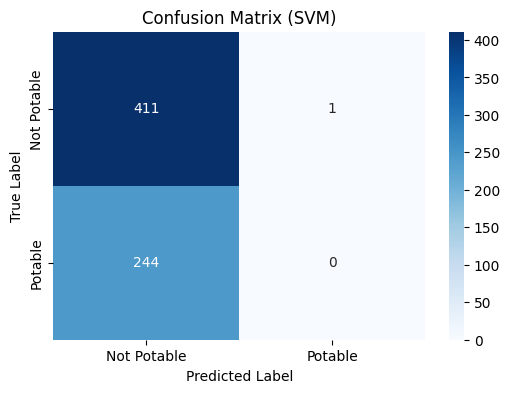

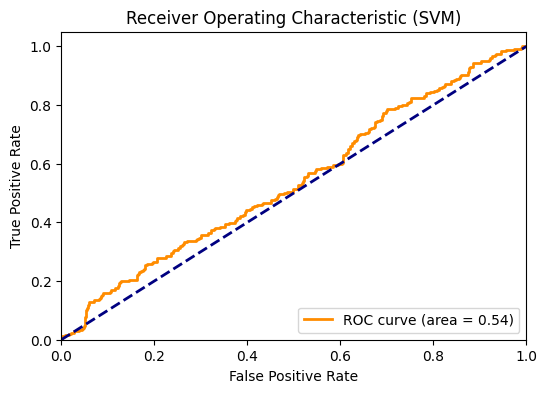


Visualizations for KNN:


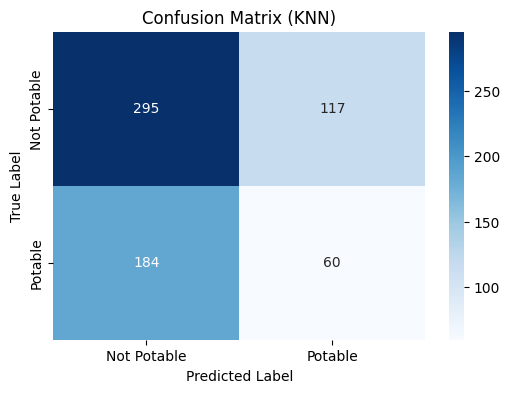

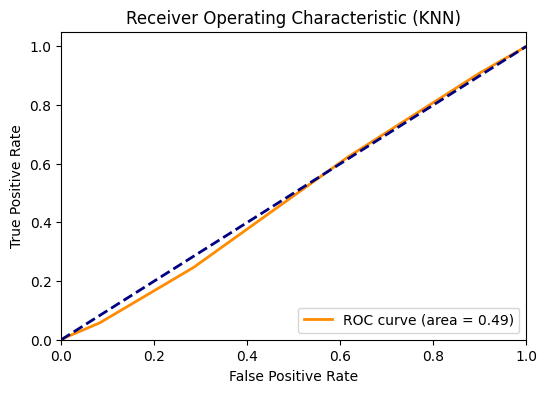


Visualizations for Decision Tree:


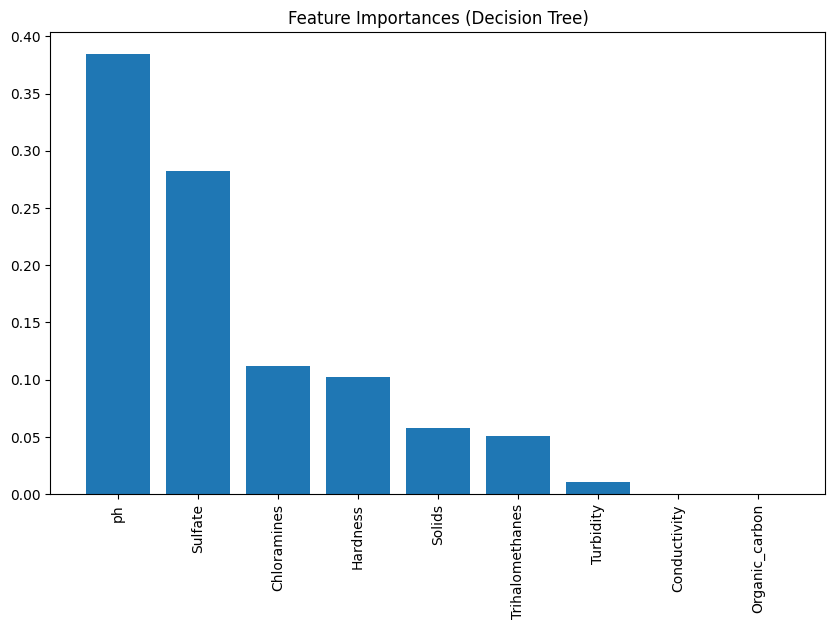

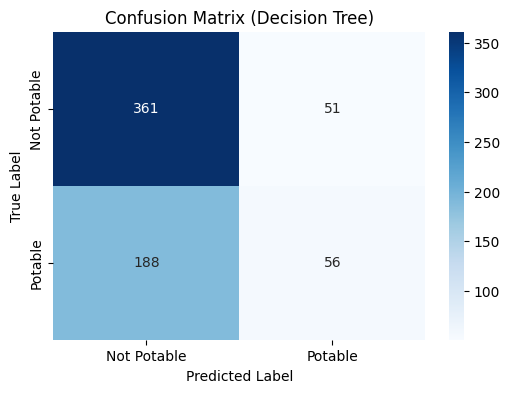

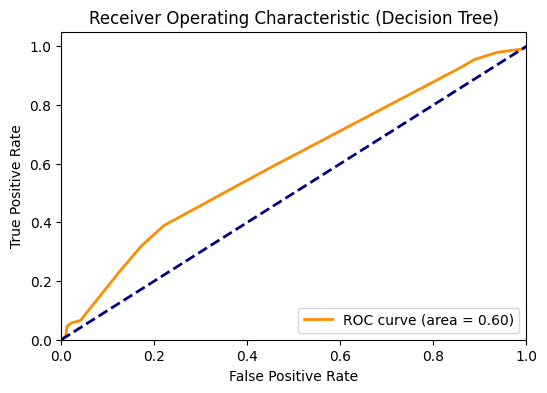


Visualizations for Gaussian Naive Bayes:


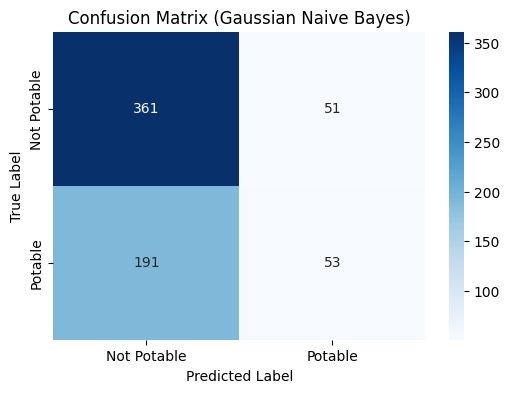

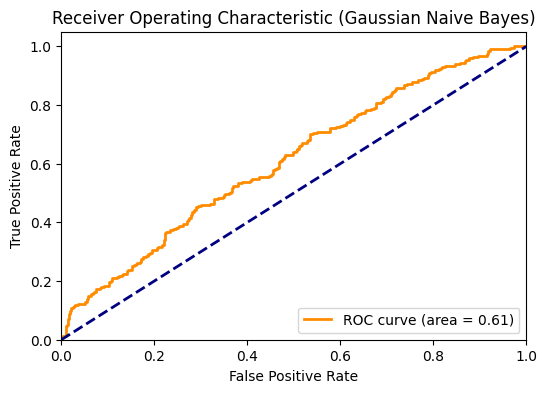


Visualizations for Random Forest:


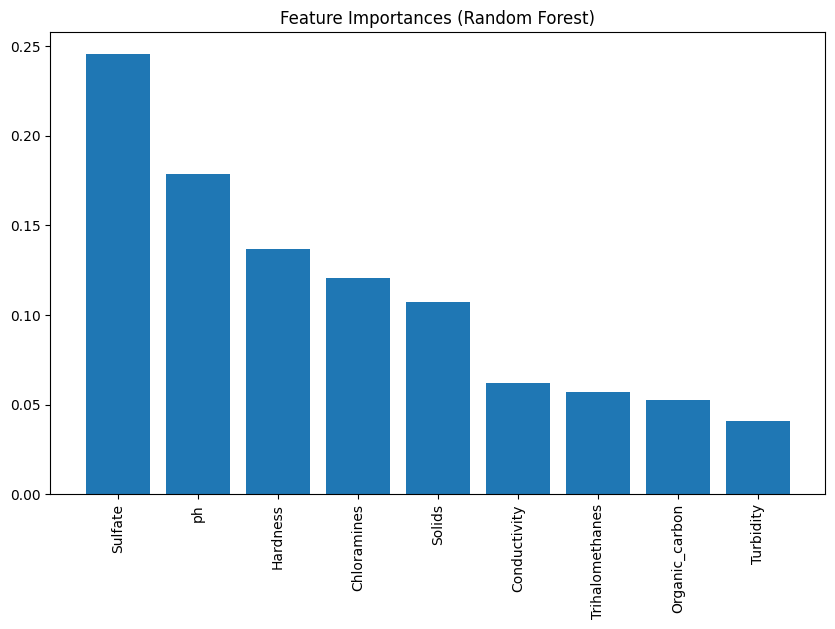

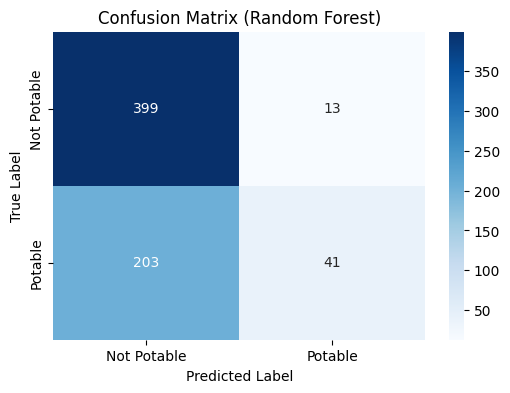

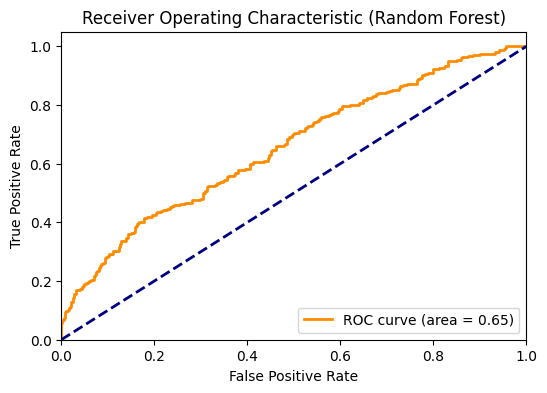


Visualizations for XGBoost:


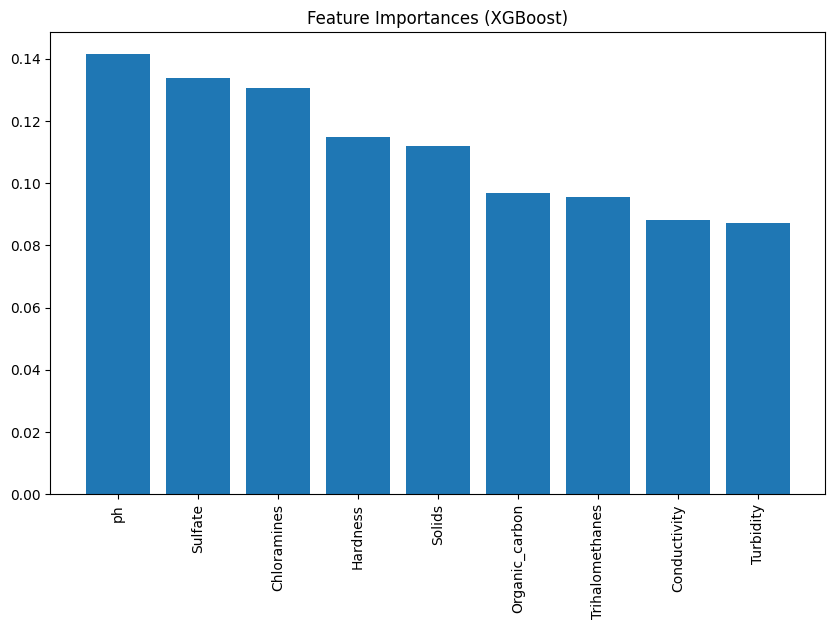

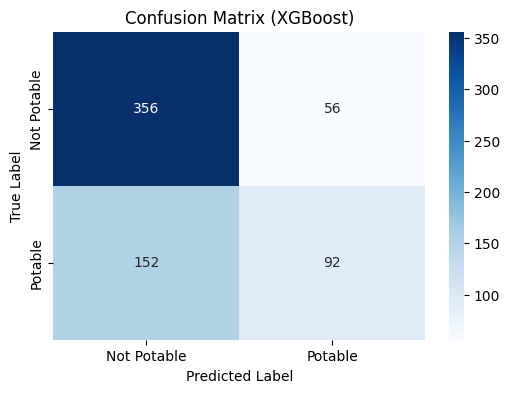

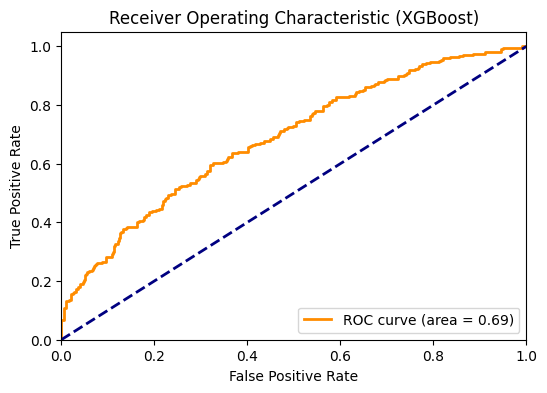

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np
# Plot 1: Feature Importance (For tree-based models: Random Forest, Decision Tree, and XGBoost)
def plot_feature_importance(model, X, model_name):
    if hasattr(model, 'feature_importances_'):
        plt.figure(figsize=(10, 6))
        feature_importances = model.feature_importances_
        sorted_idx = np.argsort(feature_importances)[::-1]
        plt.bar(range(X.shape[1]), feature_importances[sorted_idx])
        plt.xticks(range(X.shape[1]), np.array(df.columns[:-1])[sorted_idx], rotation=90)
        plt.title(f'Feature Importances ({model_name})')
        plt.show()
    else:
        print(f'Feature importance is not available for {model_name}')

# Plot 2: Confusion Matrix for all models
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
    plt.title(f'Confusion Matrix ({model_name})')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Plot 3: ROC Curve for all models
def plot_roc_curve(model, X_test, y_test, model_name):
    # For models that provide probability scores, use predict_proba or decision_function
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # Get probability scores for the positive class
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test)
    else:
        print(f'ROC curve is not available for {model_name}')
        return

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic ({model_name})')
    plt.legend(loc='lower right')
    plt.show()

# Loop through all models and generate visualizations
for model_name, model in best_models.items():
    print(f"\nVisualizations for {model_name}:")

    # Plot feature importance only for tree-based models
    if model_name in ['Random Forest', 'Decision Tree', 'XGBoost']:
        plot_feature_importance(model, X_test, model_name)

    # Plot confusion matrix for all models
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, model_name)

    # Plot ROC curve for all models that support it
    plot_roc_curve(model, X_test, y_test, model_name)

Visualizations for SVM:


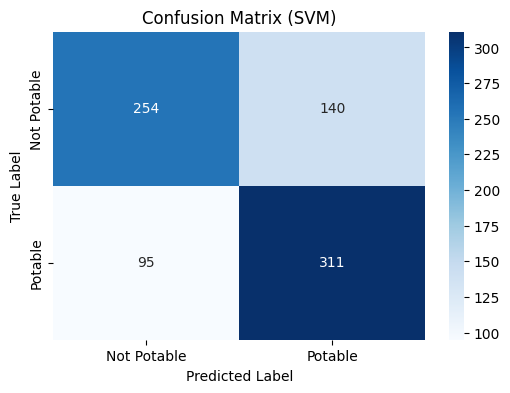

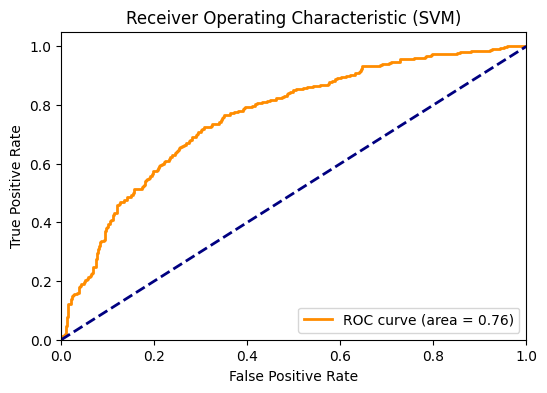

Visualizations for KNN:


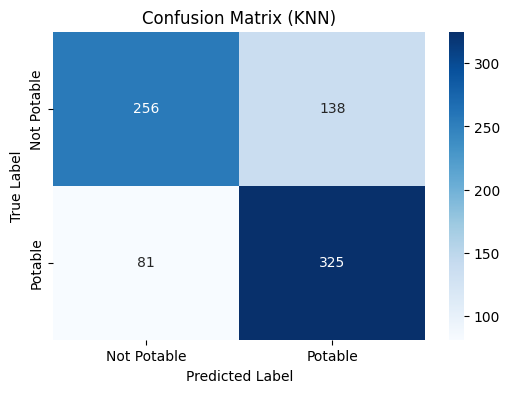

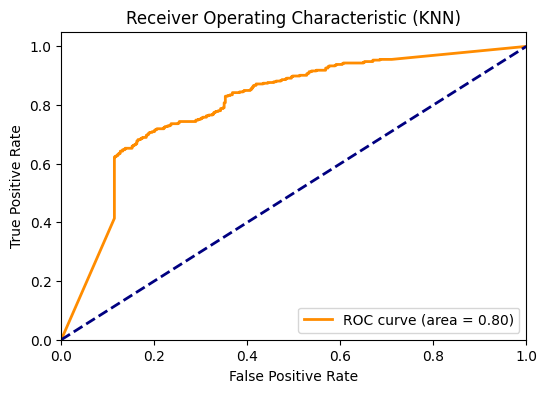

Visualizations for Decision Tree:


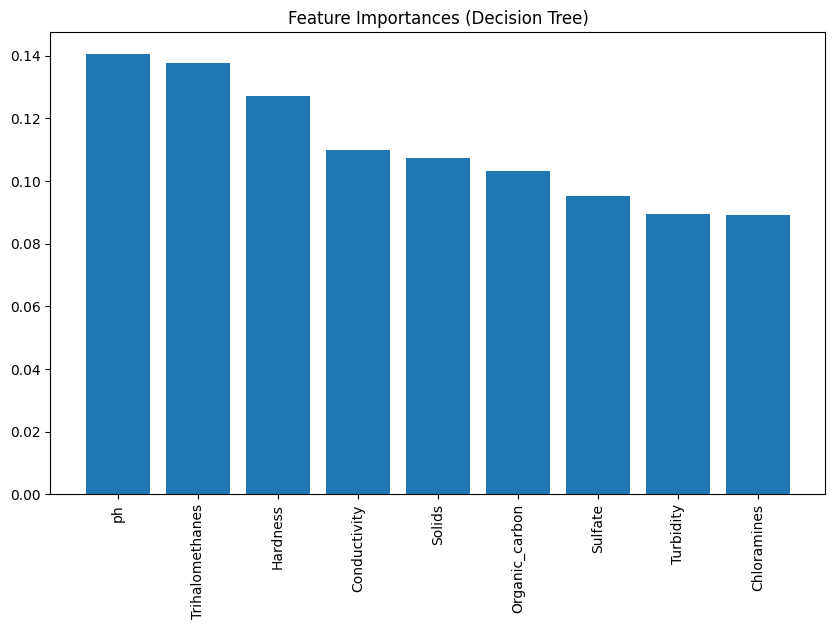

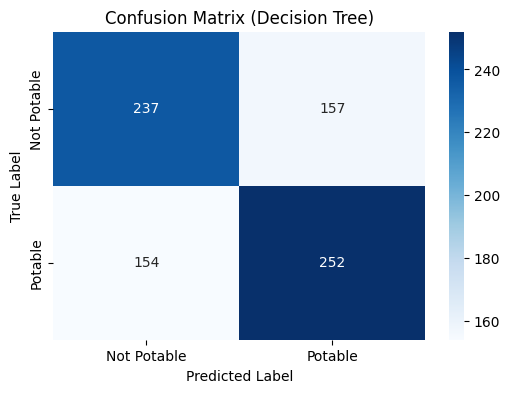

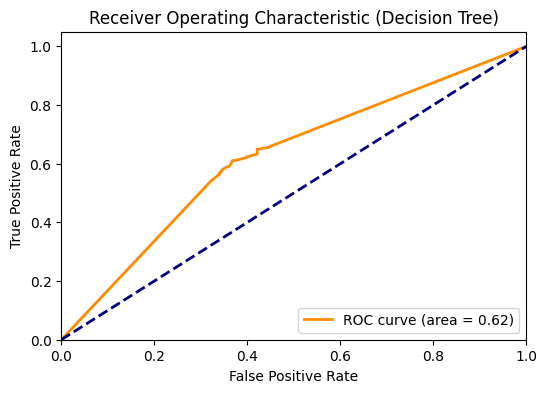

Visualizations for Gaussian Naive Bayes:


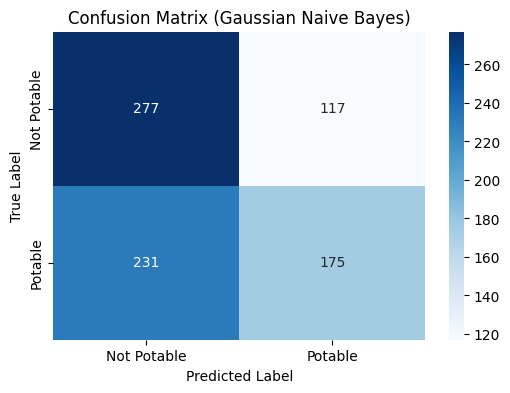

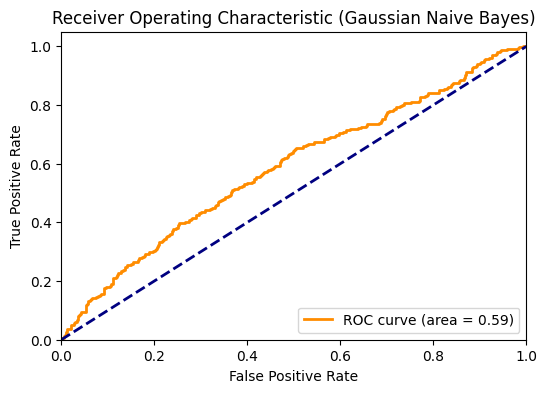

Visualizations for Random Forest:


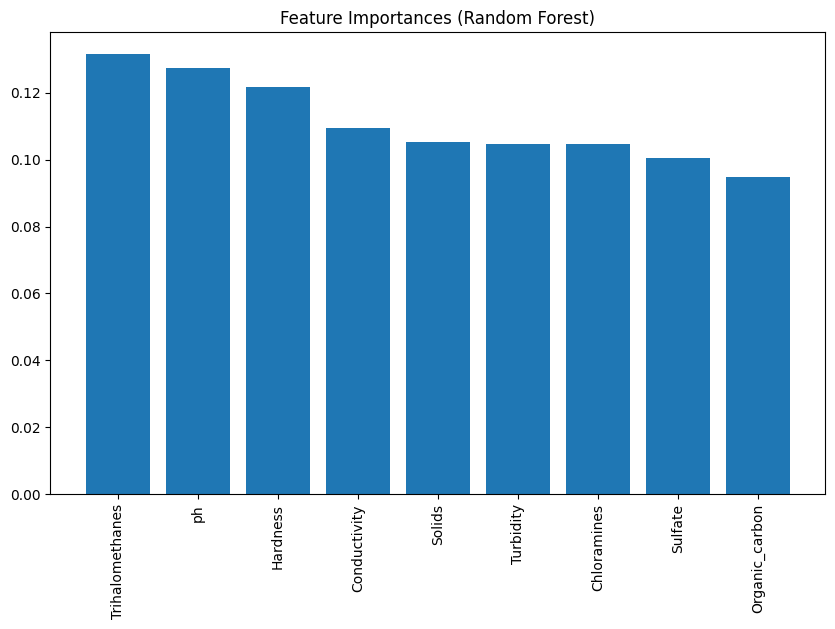

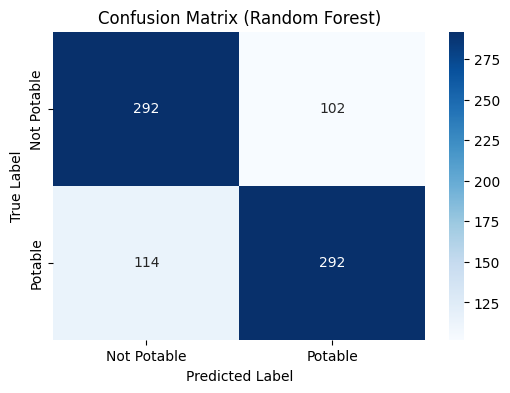

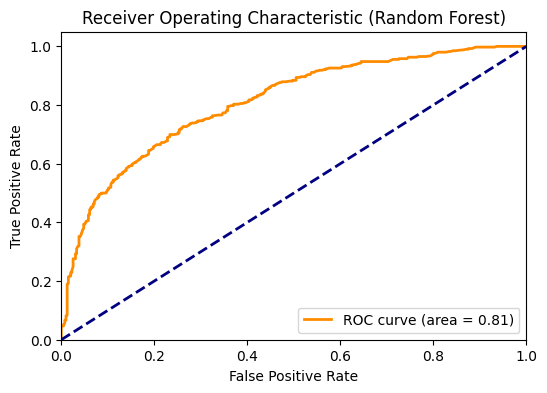

Visualizations for XGBoost:


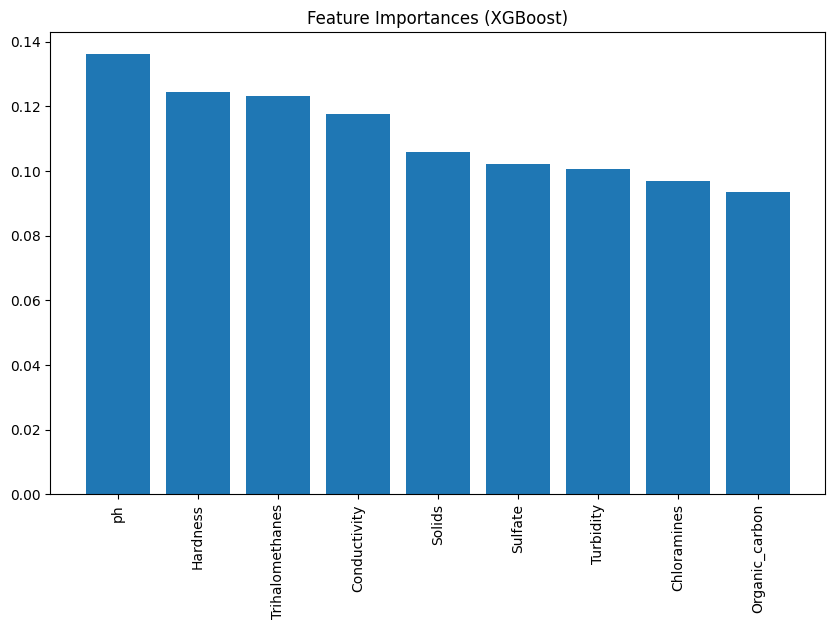

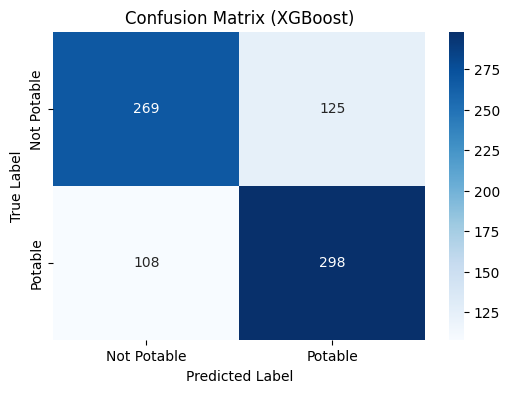

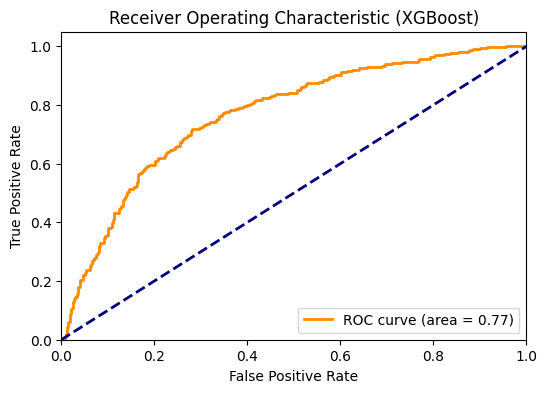

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np

# Plot 1: Feature Importance (For tree-based models: Random Forest, Decision Tree, and XGBoost)
def plot_feature_importance(model, X, model_name):
    if hasattr(model, 'feature_importances_'):
        plt.figure(figsize=(10, 6))
        feature_importances = model.feature_importances_
        sorted_idx = np.argsort(feature_importances)[::-1]
        plt.bar(range(X.shape[1]), feature_importances[sorted_idx])
        plt.xticks(range(X.shape[1]), np.array(df.columns[:-1])[sorted_idx], rotation=90)
        plt.title(f'Feature Importances ({model_name})')
        plt.show()
    else:
        print(f'Feature importance is not available for {model_name}')

# Plot 2: Confusion Matrix for all models
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
    plt.title(f'Confusion Matrix ({model_name})')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Plot 3: ROC Curve for all models
def plot_roc_curve(model, X_test, y_test, model_name):
    # For models that provide probability scores, use predict_proba or decision_function
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # Get probability scores for the positive class
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test)
    else:
        print(f'ROC curve is not available for {model_name}')
        return

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic ({model_name})')
    plt.legend(loc='lower right')
    plt.show()

# Loop through all models and generate visualizations
for model_name, model in models.items():
    print(f"Visualizations for {model_name}:")

    # Plot feature importance only for tree-based models
    if model_name in ['Random Forest', 'Decision Tree', 'XGBoost']:
        plot_feature_importance(model, X_test, model_name)

    # Plot confusion matrix for all models
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, model_name)

    # Plot ROC curve for all models (SVM, Random Forest, KNN, Decision Tree, GaussianNB, XGBoost)
    plot_roc_curve(model, X_test, y_test, model_name)


/tmp/ipykernel_6627/242703743.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_6627/242703743.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_6627/242703743.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_6627/242703743.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_6627/242703743.py:68: UserWarning: set_ticklabels() s

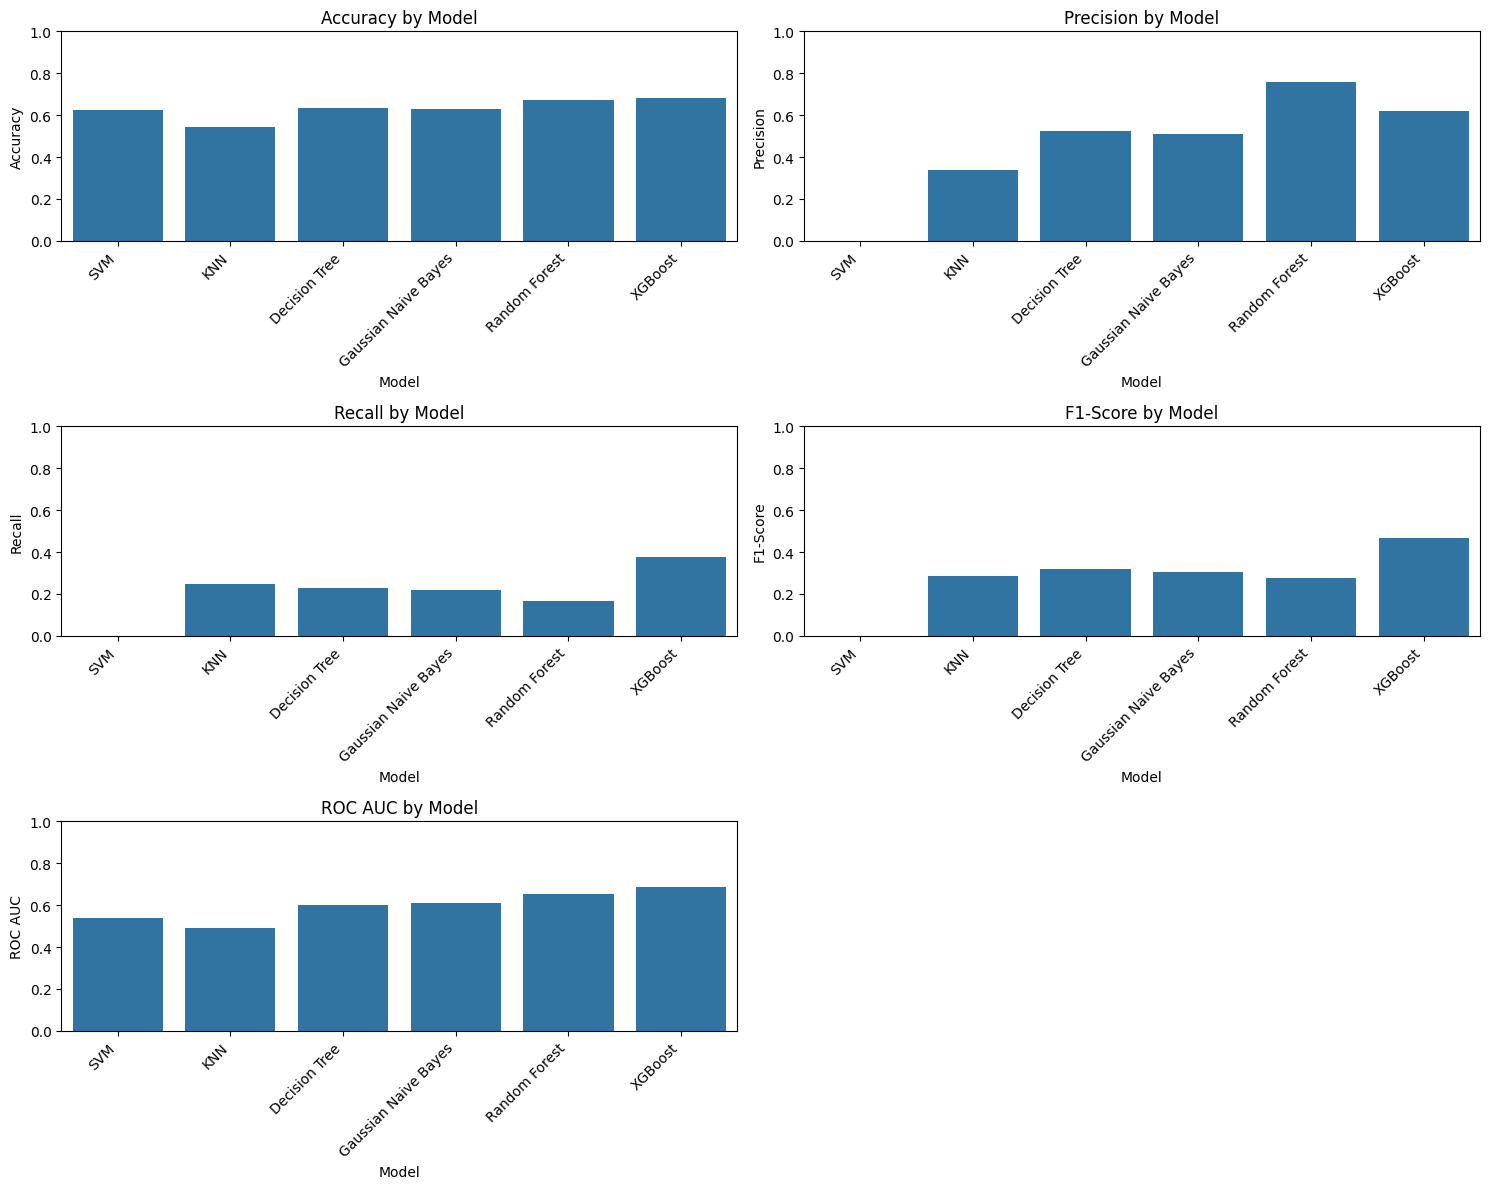

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd  # Importing pandas to handle DataFrame operations
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to calculate and store the performance metrics
def calculate_metrics(models, X_test, y_test):
    metrics_dict = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'ROC AUC': []}

    for model_name, model in models.items():
        y_pred = model.predict(X_test)

        # If the model can output probabilities, calculate ROC AUC
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_prob = model.decision_function(X_test)
        else:
            y_prob = None

        # Store the metrics
        metrics_dict['Model'].append(model_name)
        metrics_dict['Accuracy'].append(accuracy_score(y_test, y_pred))
        metrics_dict['Precision'].append(precision_score(y_test, y_pred))
        metrics_dict['Recall'].append(recall_score(y_test, y_pred))
        metrics_dict['F1-Score'].append(f1_score(y_test, y_pred))

        if y_prob is not None:
            metrics_dict['ROC AUC'].append(roc_auc_score(y_test, y_prob))
        else:
            metrics_dict['ROC AUC'].append(np.nan)  # ROC AUC is not available for this model

    return metrics_dict

# Function to plot the bar graph for each metric
def plot_metrics_bar_chart(metrics_dict):
    metrics_df = pd.DataFrame(metrics_dict)

    # Plot the metrics using Seaborn for better visual aesthetics
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    fig.subplots_adjust(hspace=0.5)

    sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=axes[0, 0])
    axes[0, 0].set_title('Accuracy by Model')
    axes[0, 0].set_ylim(0, 1)

    sns.barplot(x='Model', y='Precision', data=metrics_df, ax=axes[0, 1])
    axes[0, 1].set_title('Precision by Model')
    axes[0, 1].set_ylim(0, 1)

    sns.barplot(x='Model', y='Recall', data=metrics_df, ax=axes[1, 0])
    axes[1, 0].set_title('Recall by Model')
    axes[1, 0].set_ylim(0, 1)

    sns.barplot(x='Model', y='F1-Score', data=metrics_df, ax=axes[1, 1])
    axes[1, 1].set_title('F1-Score by Model')
    axes[1, 1].set_ylim(0, 1)

    sns.barplot(x='Model', y='ROC AUC', data=metrics_df, ax=axes[2, 0])
    axes[2, 0].set_title('ROC AUC by Model')
    axes[2, 0].set_ylim(0, 1)

    # Remove the last empty subplot (axes[2,1])
    fig.delaxes(axes[2, 1])

    for ax in axes.flat:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

    plt.tight_layout()
    plt.show()

# Assuming models is a dictionary with trained models
metrics_dict = calculate_metrics(best_models, X_test, y_test)

# Plot the bar charts for performance metrics
plot_metrics_bar_chart(metrics_dict)


/tmp/ipykernel_19167/807115495.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_19167/807115495.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_19167/807115495.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_19167/807115495.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_19167/807115495.py:64: UserWarning: set_ticklabel

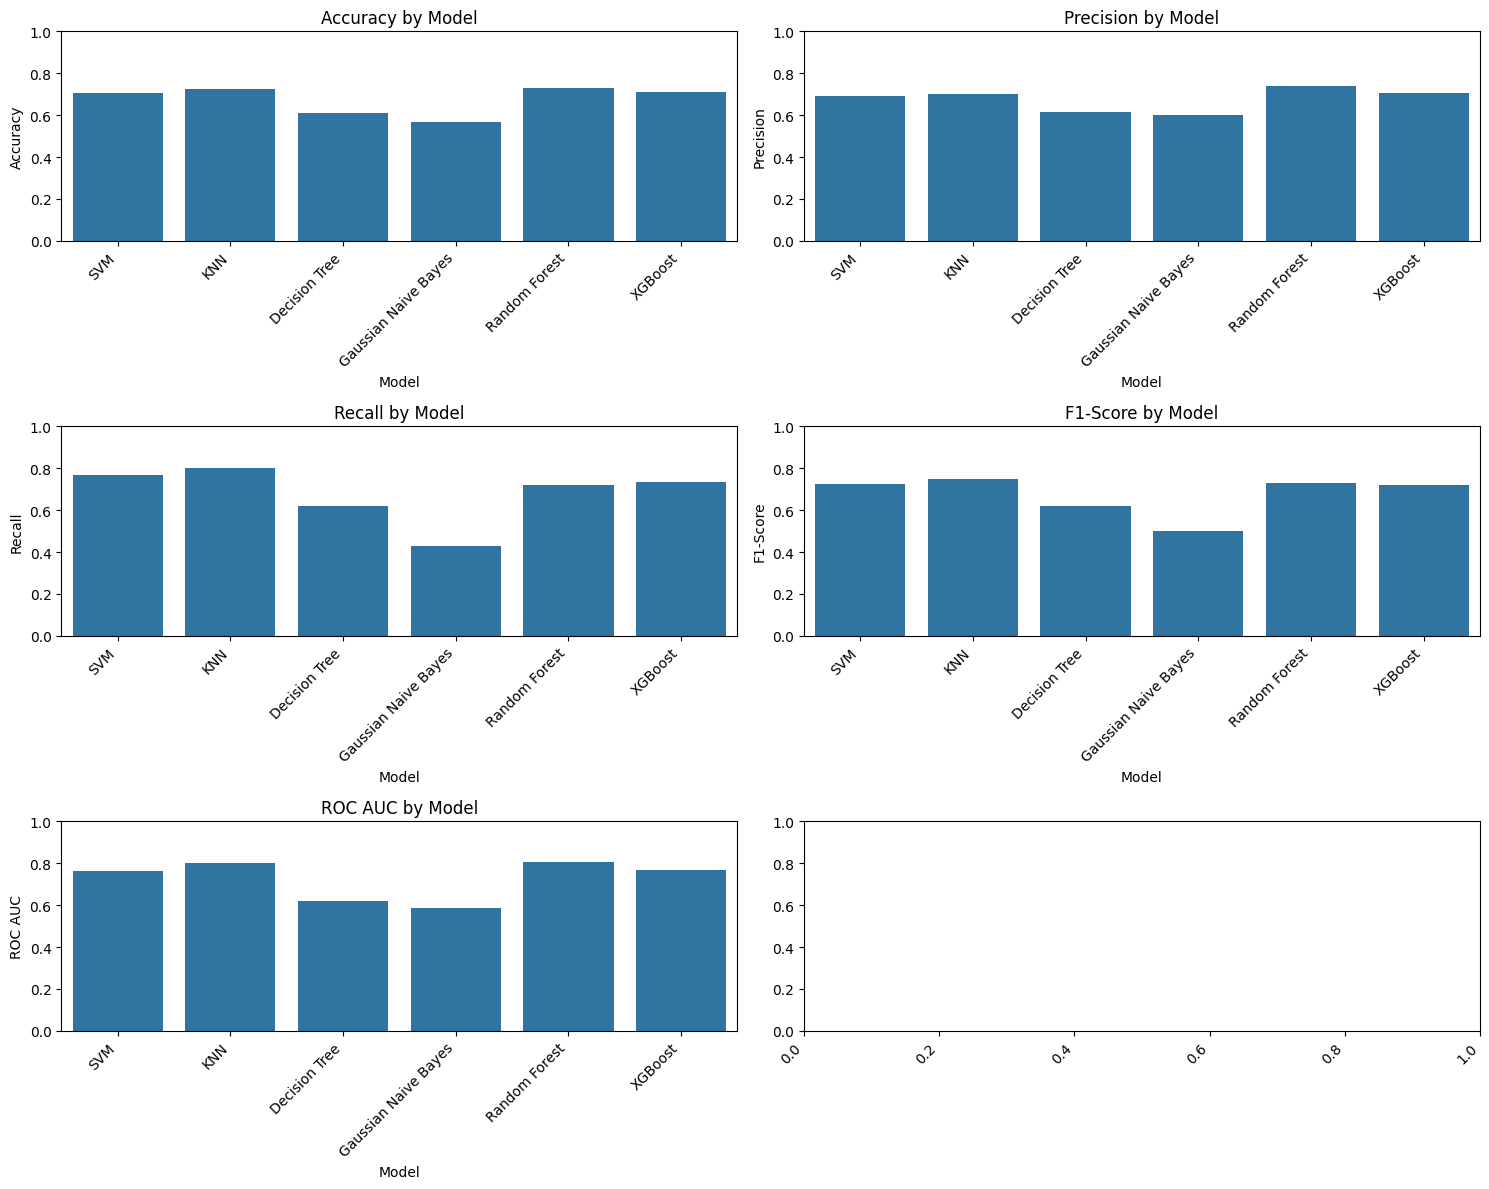

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to calculate and store the performance metrics
def calculate_metrics(models, X_test, y_test):
    metrics_dict = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'ROC AUC': []}

    for model_name, model in models.items():
        y_pred = model.predict(X_test)

        # If the model can output probabilities, calculate ROC AUC
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_prob = model.decision_function(X_test)
        else:
            y_prob = None

        # Store the metrics
        metrics_dict['Model'].append(model_name)
        metrics_dict['Accuracy'].append(accuracy_score(y_test, y_pred))
        metrics_dict['Precision'].append(precision_score(y_test, y_pred))
        metrics_dict['Recall'].append(recall_score(y_test, y_pred))
        metrics_dict['F1-Score'].append(f1_score(y_test, y_pred))

        if y_prob is not None:
            metrics_dict['ROC AUC'].append(roc_auc_score(y_test, y_prob))
        else:
            metrics_dict['ROC AUC'].append(np.nan)  # ROC AUC is not available for this model

    return metrics_dict

# Function to plot the bar graph for each metric
def plot_metrics_bar_chart(metrics_dict):
    metrics_df = pd.DataFrame(metrics_dict)

    # Plot the metrics using Seaborn for better visual aesthetics
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    fig.subplots_adjust(hspace=0.5)

    sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=axes[0, 0])
    axes[0, 0].set_title('Accuracy by Model')
    axes[0, 0].set_ylim(0, 1)

    sns.barplot(x='Model', y='Precision', data=metrics_df, ax=axes[0, 1])
    axes[0, 1].set_title('Precision by Model')
    axes[0, 1].set_ylim(0, 1)

    sns.barplot(x='Model', y='Recall', data=metrics_df, ax=axes[1, 0])
    axes[1, 0].set_title('Recall by Model')
    axes[1, 0].set_ylim(0, 1)

    sns.barplot(x='Model', y='F1-Score', data=metrics_df, ax=axes[1, 1])
    axes[1, 1].set_title('F1-Score by Model')
    axes[1, 1].set_ylim(0, 1)

    sns.barplot(x='Model', y='ROC AUC', data=metrics_df, ax=axes[2, 0])
    axes[2, 0].set_title('ROC AUC by Model')
    axes[2, 0].set_ylim(0, 1)

    for ax in axes.flat:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

    plt.tight_layout()
    plt.show()

# Assuming models is a dictionary with trained models
metrics_dict = calculate_metrics(models, X_test, y_test)

# Plot the bar charts for performance metrics
plot_metrics_bar_chart(metrics_dict)
